# Making Cool Visualizations from Images



## Imports


In [1]:
import pandas as pd
import plotly.express as px
from PIL import Image

Pandas is an all-purpose package for working with tables. 

PIL (Python Image Library, otherwise known as Pillow) allows us to manipulate images.

Plotly is my favorite chart-builder for python. MatplotLib and Seaborn work just as well! It is here to visualize our data before we bring it into Tableau. 

In [21]:

import plotly.graph_objects as go
import numpy as np

def hexagon_points(center_x, center_y, size):
    """Generate the x, y coordinates of a hexagon centered at (center_x, center_y)."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x = center_x + size * np.cos(angles)
    y = center_y + size * np.sin(angles)
    return x, y

def plot_interlocking_hex_palette(hex_colors, hex_size=50, spacing=10):
    fig = go.Figure()
    
    dx = 1.5 * hex_size + spacing  # Horizontal spacing between columns
    dy = np.sqrt(3) * hex_size / 2  # Vertical height of a hexagon

    for i, color in enumerate(hex_colors):
        x_center = i * dx
        # Offset every other hexagon vertically
        y_center = dy if i % 2 == 1 else 0

        x_hex, y_hex = hexagon_points(x_center, y_center, hex_size)
        
        fig.add_trace(go.Scatter(
            x=x_hex, y=y_hex,
            fill="toself",
            mode="lines",
            line=dict(color="black"),
            fillcolor=color,
            hoverinfo="skip"
        ))

    fig.update_layout(
        showlegend=False,
        xaxis=dict(visible=False),
        yaxis=dict(visible=False, scaleanchor="x"),  # keep aspect ratio square
        margin=dict(l=0, r=0, t=0, b=0),
        plot_bgcolor="white",
        width=int(len(hex_colors) * dx),
        height=int(2 * dy + hex_size)
    )

    fig.show()

# Example usage


hex_colors = [

  "#4E79C5",
  "#60AB9E",
  "#69B190",
  "#77B77D",
  "#8CBC68",
  "#A6BE54",
  "#BEBC48",
  "#D1B541",
  "#DDAA3C",
  "#E49C39",
  "#E78C35",
  "#E67932",
  "#E4632D",
  "#DF4828",
  "#DA2222",
  "#B8221E",
  "#95211B",
  "#721E17",
  "#521A13"
]
plot_interlocking_hex_palette(hex_colors)


In [ ]:
const hexColors1 = [
  "#59a14f",
  "#bab0ac",
  "#76b7b2",
  "#9c755f",
  "#e15759",
  "#ff9da7",
  "#f28e2b",
  "#b07aa1",
  "#4e79a7",
  "#edc948"
];

const hexColors2 = [
  "#303030",
  "#009e74",
  "#0071b2",
  "#56b3e9",
  "#f0e442",
  "#e69f00",
  "#d55c00",
  "#cc79a7"
];

const paulTolMuted = [
  "#dddddd",
  "#2f2585",
  "#337539",
  "#5da899",
  "#94caec",
  "#dcce7d",
  "#c36a77",
  "#9f4a97",
  "#7e2954"
];

const hexColors3 = [
  "#dddddd",
  "#aaaa00",
  "#bbcc33",
  "#44bb99",
  "#99ddff",
  "#ffaabb",
  "#eedd88",
  "#ee8866",
  "#77aadd"
];

const paulTolRainbow = [
  "#6F4C9B",
  "#


In [ ]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

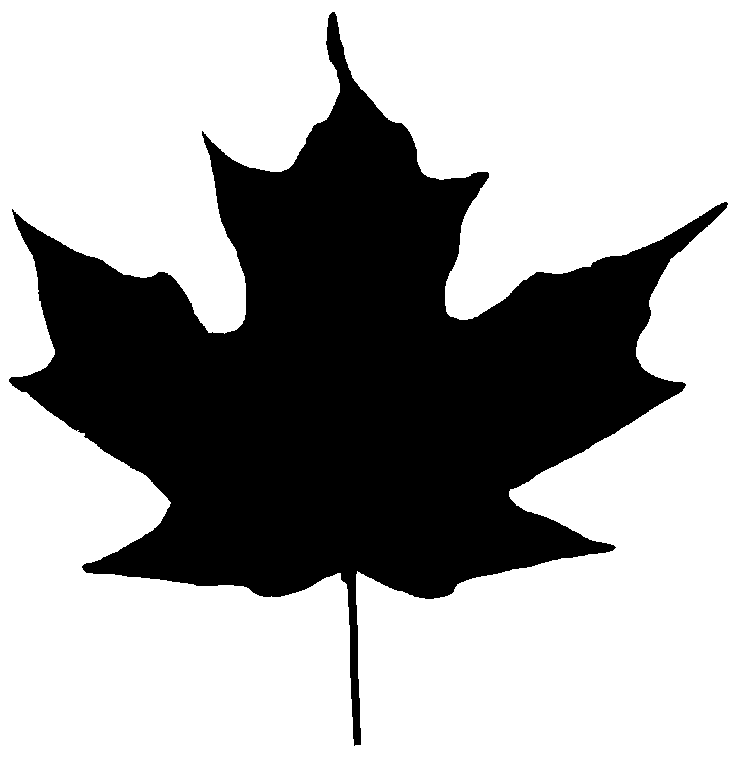

In [5]:
# creating a object 
im = Image.open(r"images\SugarMapleLeaf.png") 
 
display(im)

In [15]:
im.height
im.width

750